In [1]:
import random
import numpy as np
import pandas as pd
import torch
import seaborn as sb
import scipy
from matplotlib import pyplot as plt

SEED = 1031
random.seed(SEED)
np.random.seed(SEED)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('3425_data.csv')
df = df.set_index('SRCID')
df['A2'] = pd.to_numeric([i.replace('"', "") for i in df.A2.tolist()])
df['p_gender_sdc'] = np.nan_to_num(pd.to_numeric([i.replace('"', "") for i in df.p_gender_sdc.tolist()], errors='coerce'), 0).astype(np.int64)
df['p_age_group_sdc'] = np.nan_to_num(pd.to_numeric([i.replace('"', "") for i in df.p_age_group_sdc.tolist()], errors='coerce'), 0).astype(np.int64)
df['p_education_sdc'] = np.nan_to_num(pd.to_numeric([i.replace('"', "") for i in df.p_education_sdc.tolist()], errors='coerce'), 0).astype(np.int64)
df['p_state_sdc'] = np.nan_to_num(pd.to_numeric([i.replace('"', "") for i in df.p_state_sdc.tolist()], errors='coerce'), 0).astype(np.int64)
df['StateMap'] = np.nan_to_num(pd.to_numeric([i.replace('"', "") for i in df.StateMap.tolist()], errors='coerce'), 0).astype(np.int64)
df.to_csv('3425.csv')
data = df[['p_age_group_sdc', 'B1a', 'B1b', 'B1c', 'B1d', 'B7']]
df

,Mode,A1,A2,undecided_voter,A3,A4a,A4b,A4c,A4d,A4e,A4f,B1a,B1b,B1c,B1d,B4,B6f,B6g,B7,V1,D1a,D1b,D1c,D1d,D1e,D1f,D3,E1a,E1b,E1c,E1d,E1e,E1f,E1g,E1h,E11a,E13,F1a,F1b,F1c,F1d,F1e,F1f,F1g,F1h,F2a,F2b,F2c,p_gender_sdc,p_age_group_sdc,p_education_sdc,p_state_sdc,StateMap,A4F2_agg,opinionated
SRCID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2,2,1,False,8,2,2,2,2,2,1,2,2,2,1,2,2,3,2,4,2,1,1,1,1,1,3,2,2,2,2,2,1,1,2,2,4,2,2,2,2,2,2,2,3,2,3,2,2,4,3,1,1,0.388889,False
3,2,2,24,False,7,2,3,2,1,2,1,2,2,2,2,3,4,5,2,4,1,2,2,3,1,3,-99,2,2,2,2,2,1,2,2,2,4,1,1,1,1,2,1,1,2,5,4,4,2,4,1,4,4,0.611111,True
4,2,2,1,False,7,2,2,2,1,2,2,2,2,2,2,3,5,5,2,3,1,1,1,1,1,1,3,2,2,2,2,2,1,1,2,2,4,2,2,2,2,2,2,2,3,2,2,2,2,4,3,5,5,0.472222,False
6,2,2,3,False,6,3,3,2,2,2,2,2,2,2,1,4,5,5,1,4,1,2,2,4,2,4,3,2,2,2,2,2,1,1,2,2,4,2,1,2,1,1,1,1,1,-98,2,2,2,4,3,4,4,8.750000,False
7,2,2,1,False,5,2,3,2,2,1,2,2,2,2,2,3,4,3,2,4,2,1,3,3,2,3,3,2,2,2,2,2,1,1,2,2,4,2,1,1,1,2,1,1,1,1,1,1,2,4,3,1,1,0.722222,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,1,2,1,False,4,1,2,1,1,1,2,2,2,2,1,3,1,1,1,4,2,2,2,3,1,1,1,1,2,2,2,2,2,1,2,1,4,1,1,1,1,1,1,1,2,2,1,2,2,2,1,2,2,0.722222,True
3583,1,2,3,False,9,1,2,1,1,1,3,2,2,2,1,2,3,2,1,4,2,1,2,1,1,1,1,2,2,2,2,2,1,1,2,2,4,1,3,1,2,4,1,1,1,2,3,2,2,4,3,5,5,0.555556,True
3585,1,1,-98,True,10,1,3,1,1,1,1,1,2,2,2,4,5,5,2,4,1,1,1,1,1,1,2,1,2,2,2,2,1,2,2,1,4,1,1,1,1,1,1,1,2,2,2,3,1,3,1,3,3,0.611111,True


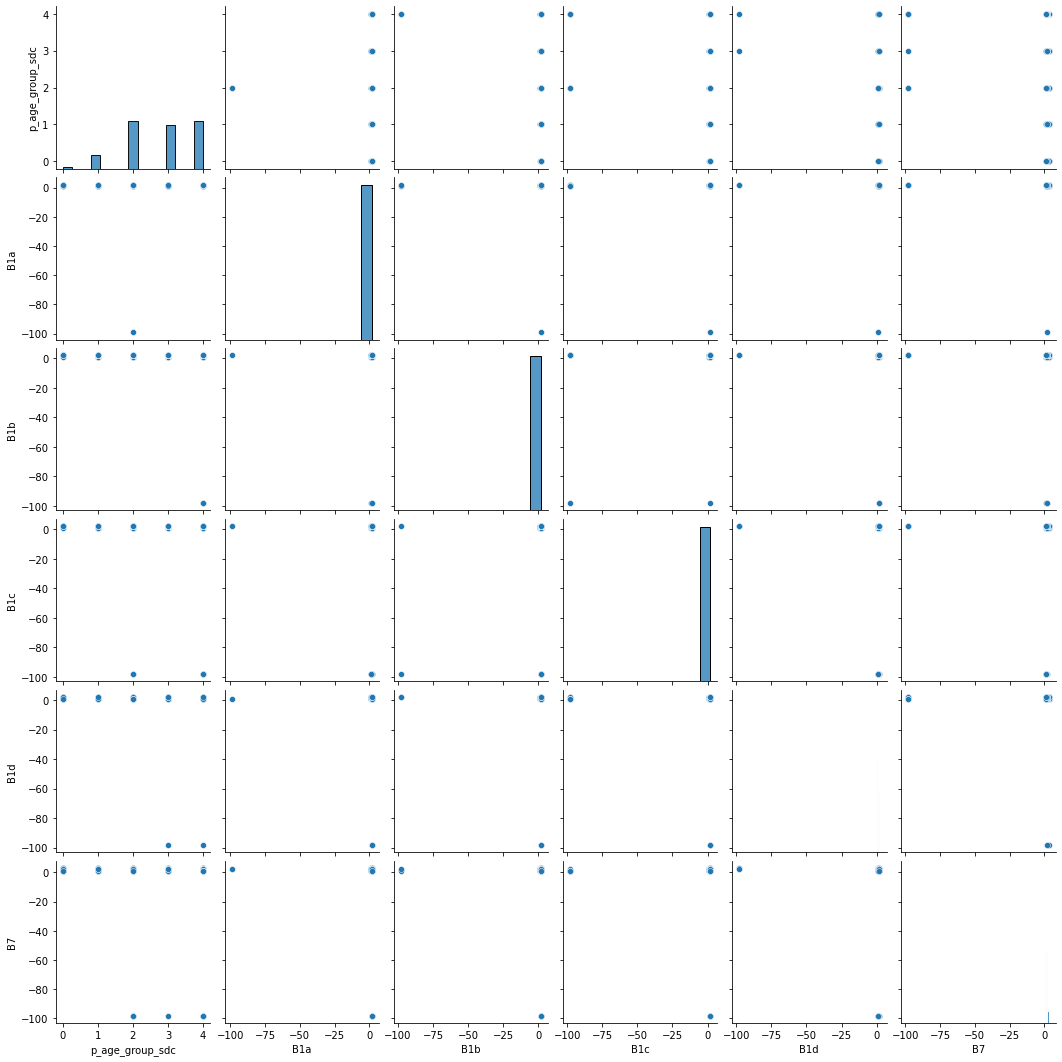

In [3]:
sb.pairplot(data)

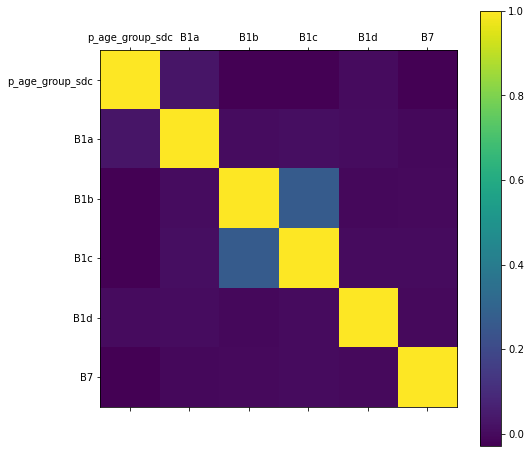

In [4]:
# plt.matshow(data.corr())
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr())
fig.colorbar(cax)
xaxis = range(len(data.keys()))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(data.keys())
ax.set_yticklabels(data.keys())
plt.savefig('data.png', bbox_inches='tight',transparent=True, pad_inches=0)

In [5]:
data.corr()

,p_age_group_sdc,B1a,B1b,B1c,B1d,B7
p_age_group_sdc,1.000000,0.029839,-0.028700,-0.025675,-0.000011,-0.025023
B1a,0.029839,1.000000,0.004150,0.009797,0.003797,-0.004907
B1b,-0.028700,0.004150,1.000000,0.266038,-0.006618,-0.000993
B1c,-0.025675,0.009797,0.266038,1.000000,0.000843,0.002051
B1d,-0.000011,0.003797,-0.006618,0.000843,1.000000,-0.001528
B7,-0.025023,-0.004907,-0.000993,0.002051,-0.001528,1.000000


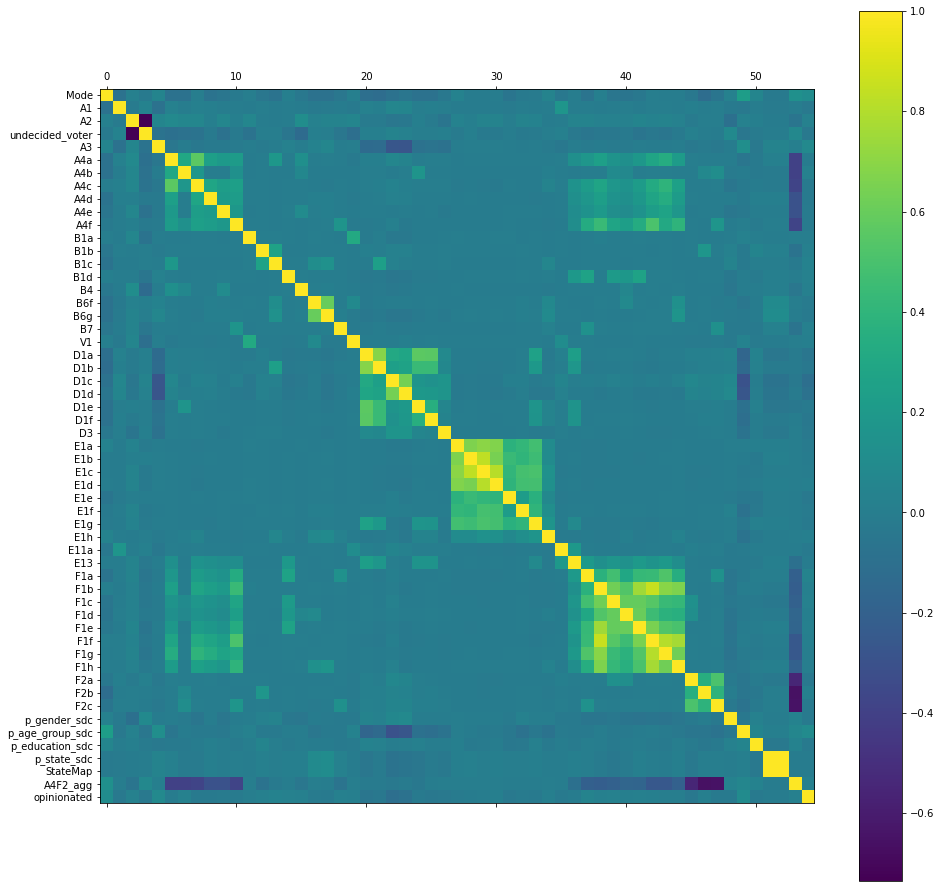

In [6]:
# plt.matshow(data.corr())
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr())
fig.colorbar(cax)
xaxis = range(len(df.corr().keys()))
ax.set_yticks(xaxis)
ax.set_yticklabels(df.corr().keys())
plt.savefig('all.png', bbox_inches='tight',transparent=True, pad_inches=0)

In [7]:
df.corr()

,Mode,A1,A2,undecided_voter,A3,A4a,A4b,A4c,A4d,A4e,A4f,B1a,B1b,B1c,B1d,B4,B6f,B6g,B7,V1,D1a,D1b,D1c,D1d,D1e,D1f,D3,E1a,E1b,E1c,E1d,E1e,E1f,E1g,E1h,E11a,E13,F1a,F1b,F1c,F1d,F1e,F1f,F1g,F1h,F2a,F2b,F2c,p_gender_sdc,p_age_group_sdc,p_education_sdc,p_state_sdc,StateMap,A4F2_agg,opinionated
Mode,1.000000,-0.079762,0.021068,-0.028045,0.048328,-0.078769,-0.077405,0.005045,-0.071020,-0.054335,-0.023675,0.006278,-0.046405,-0.073513,0.016410,-0.036798,-0.078054,-0.077393,-0.046073,0.016524,-0.102165,-0.112922,-0.082041,-0.053264,-0.082905,-0.082837,-0.039747,0.032038,-0.004889,-0.004235,-0.002366,-0.060236,-0.017905,-0.011458,0.042413,-0.037859,0.002862,-0.066586,0.011297,-0.055848,-0.063379,-0.038219,0.006547,0.000705,0.001048,-0.037453,-0.114903,-0.059280,0.028162,0.228514,0.058187,-0.023336,-0.023336,0.135406,0.109094
A1,-0.079762,1.000000,-0.015655,0.031214,-0.081602,0.030282,0.002706,0.022053,0.015094,0.002656,-0.000509,-0.008029,0.008568,-0.009192,-0.001487,-0.003411,-0.020003,-0.016104,-0.008881,-0.023823,0.027324,0.014968,0.064644,0.054524,0.005333,0.011245,0.008619,-0.005519,-0.004521,-0.008250,-0.007578,-0.014028,0.000798,-0.003056,-0.002438,0.172483,0.002166,-0.000126,-0.009069,-0.001518,0.004304,-0.003006,0.004527,0.005339,-0.000720,0.013847,0.001119,0.006079,-0.025283,-0.031143,0.003248,-0.010892,-0.010892,0.001007,-0.036602
A2,0.021068,-0.015655,1.000000,-0.734534,0.057090,0.083726,0.063002,0.060938,0.016705,0.062038,0.016550,0.061053,0.001085,-0.007878,0.003323,0.113939,0.030582,0.041326,0.037906,0.052087,-0.012670,-0.012242,-0.049640,-0.039458,0.016382,-0.011973,-0.062756,0.033463,0.011479,0.042175,0.040541,0.004044,0.044197,0.031898,-0.006139,0.002365,0.041726,0.040314,0.029358,0.030049,0.025167,0.044949,0.032607,0.039809,0.026219,-0.010431,0.006040,0.009152,-0.090874,0.028229,0.017148,-0.008710,-0.008710,-0.057780,0.027376
undecided_voter,-0.028045,0.031214,-0.734534,1.000000,-0.077028,-0.096851,-0.079876,-0.074738,-0.020250,-0.081951,-0.023335,-0.077026,0.004422,0.009999,-0.052584,-0.130332,0.011408,0.009191,-0.044845,-0.104308,0.015391,0.014906,0.042224,0.027107,0.010770,0.010362,0.011596,-0.015760,0.012790,-0.029617,-0.027340,-0.001838,-0.019595,-0.012332,0.009922,0.018079,-0.031548,-0.053282,-0.039447,-0.041972,-0.029029,-0.060133,-0.039886,-0.051787,-0.028821,0.018328,0.000728,-0.009541,0.087909,-0.049811,-0.010670,0.002320,0.002320,0.074437,-0.033681
A3,0.048328,-0.081602,0.057090,-0.077028,1.000000,-0.043610,-0.006719,-0.040871,-0.026208,-0.026153,-0.012194,-0.000026,-0.014674,0.001921,0.027572,-0.001168,0.033756,0.062851,0.002678,0.009304,-0.130027,-0.120149,-0.268668,-0.275818,-0.080035,-0.068572,-0.081640,0.002696,0.004046,0.010752,0.009097,-0.000681,-0.002823,0.001422,-0.013769,-0.036996,0.003064,-0.011032,-0.005685,-0.016076,-0.010558,0.003831,-0.003055,-0.005786,0.003736,-0.033502,-0.013437,-0.034344,-0.008763,0.125704,-0.035261,0.038888,0.038888,0.012194,0.080797
A4a,-0.078769,0.030282,0.083726,-0.096851,-0.043610,1.000000,0.296313,0.563529,0.243614,0.203001,0.214549,-0.007996,-0.001968,0.183160,0.001181,0.126119,-0.001484,0.006712,-0.001014,-0.019235,0.012463,0.013724,0.059599,0.041588,0.001003,0.010233,0.005470,-0.003457,0.000214,-0.002456,-0.000918,0.000011,0.001081,0.000077,0.002360,0.010271,0.131987,0.179072,0.241793,0.155629,0.127844,0.186276,0.280419,0.340453,0.219074,0.004462,-0.000188,0.001901,0.002525,-0.056426,-0.023923,0.024015,0.024015,-0.398242,-0.006182
A4b,-0.077405,0.002706,0.063002,-0.079876,-0.006719,0.296313,1.000000,0.177172,0.003367,0.003505,0.133864,-0.008317,-0.000382,-0.004270,-0.003392,0.068792,-0.004760,-0.003490,-0.004937,-0.004705,0.010691,0.007170,-0.003716,0.010065,0.165900,-0.002355,-0.000076,-0.008987,-0.008080,-0.008753,-0.009371,-0.008750,-0.003914,-0.009076,0.013422,0.003155,-0.004197,0.002840,0.002147,0.092452,0.075610,0.001873,0.004861,0.005331,0.003625,-0.002661,0.075989,0.112721,-0.013637,-0.006977,-0.019668,-0.014310,-0.014310,-0.399378,0.030291
A4c,0.005045,0.0220

In [8]:
df[[i for i in df.keys() if i.startswith('B1') or i in ('B7')]].corr()

,B1a,B1b,B1c,B1d,B7
B1a,1.000000,0.004150,0.009797,0.003797,-0.004907
B1b,0.004150,1.000000,0.266038,-0.006618,-0.000993
B1c,0.009797,0.266038,1.000000,0.000843,0.002051
B1d,0.003797,-0.006618,0.000843,1.000000,-0.001528
B7,-0.004907,-0.000993,0.002051,-0.001528,1.000000


In [9]:
df[[i for i in df.keys() if i.startswith('A4') and i not in ('A4F2_agg')]].corr()

,A4a,A4b,A4c,A4d,A4e,A4f
A4a,1.000000,0.296313,0.563529,0.243614,0.203001,0.214549
A4b,0.296313,1.000000,0.177172,0.003367,0.003505,0.133864
A4c,0.563529,0.177172,1.000000,0.285031,0.228797,0.244300
A4d,0.243614,0.003367,0.285031,1.000000,0.208331,0.221879
A4e,0.203001,0.003505,0.228797,0.208331,1.000000,0.183372
A4f,0.214549,0.133864,0.244300,0.221879,0.183372,1.000000


In [10]:
df[[i for i in df.keys() if i.startswith('E') and i not in ('E11a', 'E13', 'E1h')]].corr()

,E1a,E1b,E1c,E1d,E1e,E1f,E1g
E1a,1.000000,0.665367,0.699564,0.673930,0.379756,0.413856,0.474774
E1b,0.665367,1.000000,0.837267,0.645124,0.437851,0.400048,0.453576
E1c,0.699564,0.837267,1.000000,0.814365,0.404744,0.490430,0.499457
E1d,0.673930,0.645124,0.814365,1.000000,0.391170,0.473169,0.482506
E1e,0.379756,0.437851,0.404744,0.391170,1.000000,0.221941,0.363962
E1f,0.413856,0.400048,0.490430,0.473169,0.221941,1.000000,0.402643
E1g,0.474774,0.453576,0.499457,0.482506,0.363962,0.402643,1.000000


In [11]:
df[[i for i in df.keys() if i.startswith('F1')]].corr().mean().mean()

0.6012804325641037

In [12]:
df[[i for i in df.keys() if i.startswith('F2')]].corr()

,F2a,F2b,F2c
F2a,1.000000,0.351928,0.512083
F2b,0.351928,1.000000,0.385884
F2c,0.512083,0.385884,1.000000


In [13]:
b=df.replace({
    'A1': {-98:6},
    'A2': {8:7,11:8,13:9,15:10,16:11,17:12,22:13,24:14,26:15,27:16,28:17,30:18,32:19,34:20,38:21,39:22,96:23,97:24,-98:25,-99:26},
    'A3': {-98:11},
    'A4a': {-98:5, -99:6},
    'A4b': {-98:5, -99:6},
    'A4c': {-98:5, -99:6},
    'A4d': {-98:5, -99:6},
    'A4e': {-98:5},
    'A4f': {-98:5},
    'B1a': {-99:3},
    'B1b': {-98:3},
    'B1c': {-98:3},
    'B1d': {-98:3},
    'B4': {-98:5, -99:6},
    'B6f': {-98:6, -99:7},
    'B6g': {-98:6, -99:7},
    'B7': {-98:4},
    'V1': {-98:5, -99:6},
    'D1a': {-99:6},
    'D1b': {-99:6},
    'D1e': {-98:6, -99:7},
    'D1f': {-98:6, -99:7},
    'D3': {-99:5},
    'E1a': {-98:3, -99:4},
    'E1b': {-98:3, -99:4},
    'E1c': {-98:3, -99:4},
    'E1d': {-98:3, -99:4},
    'E1e': {-98:3, -99:4},
    'E1f': {-98:3, -99:4},
    'E1g': {-98:3, -99:4},
    'E1h': {-98:3, -99:4},
    'E11a': {-98:5, -99:6},
    'E13': {-98:5, -99:6},
    'F1a': {-98:5, -99:6},
    'F1b': {-98:5, -99:6},
    'F1c': {-98:5, -99:6},
    'F1d': {-98:5, -99:6},
    'F1e': {-98:5, -99:6},
    'F1f': {-98:5, -99:6},
    'F1g': {-98:5, -99:6},
    'F1h': {-98:5, -99:6},
    'F2a': {-98:6, -99:7},
    'F2b': {-98:6, -99:7},
    'F2c': {-98:6, -99:7},
})
b[[i for i in b.keys() if i.startswith(('A', 'B', 'C', 'D', 'E', 'F', 'M', 'V')) and i != 'A3']] -= 1
for i in b.columns:
    print(i, set(b[i]))
b.to_csv('standard.csv')

Mode {0, 1}
A1 {0, 1, 2, 3, 4, 5}
A2 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}
undecided_voter {False, True}
A3 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
A4a {0, 1, 2, 3, 4, 5}
A4b {0, 1, 2, 3, 4, 5}
A4c {0, 1, 2, 3, 4, 5}
A4d {0, 1, 2, 3, 4, 5}
A4e {0, 1, 2, 3, 4}
A4f {0, 1, 2, 3, 4}
B1a {0, 1, 2}
B1b {0, 1, 2}
B1c {0, 1, 2}
B1d {0, 1, 2}
B4 {0, 1, 2, 3, 4, 5}
B6f {0, 1, 2, 3, 4, 5, 6}
B6g {0, 1, 2, 3, 4, 5, 6}
B7 {0, 1, 2, 3}
V1 {0, 1, 2, 3, 4, 5}
D1a {0, 1, 2, 3, 4, 5}
D1b {0, 1, 2, 3, 4, 5}
D1c {0, 1, 2, 3, 4}
D1d {0, 1, 2, 3, 4}
D1e {0, 1, 2, 3, 4, 5, 6}
D1f {0, 1, 2, 3, 4, 5, 6}
D3 {0, 1, 2, 3, 4}
E1a {0, 1, 2, 3}
E1b {0, 1, 2, 3}
E1c {0, 1, 2, 3}
E1d {0, 1, 2, 3}
E1e {0, 1, 2, 3}
E1f {0, 1, 2, 3}
E1g {0, 1, 2, 3}
E1h {0, 1, 2, 3}
E11a {0, 1, 2, 3, 4, 5}
E13 {0, 1, 2, 3, 4, 5}
F1a {0, 1, 2, 3, 4}
F1b {0, 1, 2, 3, 4}
F1c {0, 1, 2, 3, 4, 5}
F1d {0, 1, 2, 3, 4, 5}
F1e {0, 1, 2, 3, 4}
F1f {0, 1, 2, 3, 4}
F1g {0, 1, 2, 3, 4}
F1h {0, 1,

In [14]:
l=[len(set(b[i])) for i in b.columns]

In [15]:
print(l)

[2, 6, 26, 2, 12, 6, 6, 6, 6, 5, 5, 3, 3, 3, 3, 6, 7, 7, 4, 6, 6, 6, 5, 5, 7, 7, 5, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 7, 7, 3, 5, 4, 9, 9, 60, 2]
